# Lab Segmentation 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from matplotlib.pyplot import bar
import skimage.io as io
from skimage.exposure import histogram
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Show the figures / plots inside the notebook


def show_images(images, titles=None):
    # This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None:
        titles = ['(%d)' % i for i in range(1, n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image, title in zip(images, titles):
        a = fig.add_subplot(1, n_ims, n)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def getThreshold(img):
    img = img.astype("uint8")
    hist, bin_edges = histogram(img, nbins=265)
    Tnew = round((sum(hist*bin_edges))/(img.shape[0]*img.shape[1]))
    Told = 0
    while Tnew != Told:
        Told = Tnew
        hist_low = hist[hist < Told]
        hist_high = hist[hist >= Told]
        Tlow = Told
        Thigh = Told
        if sum(hist_low) != 0:
            Tlow = round((sum(hist_low*bin_edges[0:len(hist_low)]))/sum(hist_low))
        if sum(hist_high) != 0:
            Thigh = round((sum(hist_high*bin_edges[len(hist_low):len(hist)]))/sum(hist_high))
        Tnew = (Tlow + Thigh)/2
    return Tnew

def splitAndSegmentN(img,N):
    parts = np.hsplit(img, N)

    for i in range(len(parts)):
        T = getThreshold(parts[i])
        parts[i] = np.where(parts[i] > T, 1, 0)

    return np.hstack(parts)
    

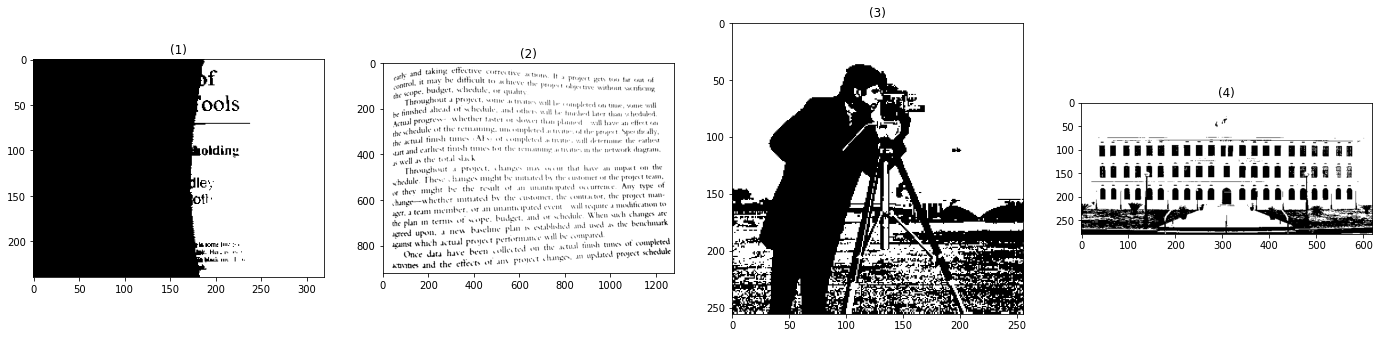

In [3]:
book = io.imread("./imgs/book.png")
book1 = rgb2gray(io.imread("./imgs/book1.png"))*255
cameraman = io.imread("./imgs/cameraman.png")
cufe = rgb2gray(io.imread("./imgs/cufe.png"))*255

Tbook = getThreshold(book)
Tbook1 = getThreshold(book1)
Tcameraman = getThreshold(cameraman)
Tcufe = getThreshold(cufe)


book = np.where(book < Tbook, 0, 1)
book1 = np.where(book1 < Tbook1, 0, 1)
cameraman = np.where(cameraman < Tcameraman, 0, 1)
cufe = np.where(cufe < Tcufe, 0, 1)

show_images([book, book1, cameraman, cufe])


In [4]:
def splitAndSegment(img):
    part0, part00 = np.hsplit(img, 2)
    part1, part2 = np.vsplit(part0, 2)
    part3, part4 = np.vsplit(part00, 2)

    part1T = getThreshold(part1)
    part2T = getThreshold(part2)
    part3T = getThreshold(part3)
    part4T = getThreshold(part4)

    part1 = np.where(part1 > part1T, 1, 0)
    part2 = np.where(part2 > part2T, 1, 0)
    part3 = np.where(part3 > part3T, 1, 0)
    part4 = np.where(part4 > part4T, 1, 0)

    part0 = np.vstack((part1, part2))
    part00 = np.vstack((part3, part4))
    return np.hstack((part0,part00))


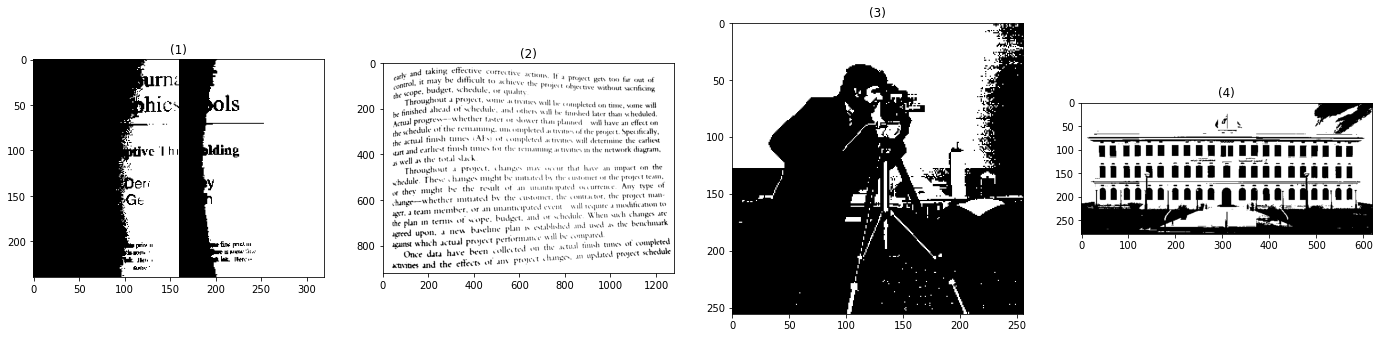

In [5]:
book = io.imread("./imgs/book.png")
book1 = rgb2gray(io.imread("./imgs/book1.png"))*255
cameraman = io.imread("./imgs/cameraman.png")
cufe = rgb2gray(io.imread("./imgs/cufe.png"))*255

show_images([splitAndSegment(book),splitAndSegment(book1),splitAndSegment(cameraman),splitAndSegmentN(cufe,5)])

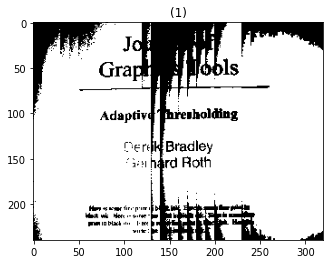

In [6]:
book = io.imread("./imgs/book.png")
show_images([splitAndSegmentN(book,32)])